In [1]:
import pandas as pd
import yellowbrick
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load suicide data into a dataframe

data = pd.read_csv("C:/Users/Tyler/Desktop/550 Python/suicide-rates-overview-1985-to-2016/master.csv")

In [3]:
# checking the dimention of the data
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (27820, 12)


### Part 1

In [4]:
#Looking at the top 5 results of our dataframe
data.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
#Looking at the types of variables in the data 
print("Describe Data")
print(data.describe())
print("Summarized Data")
print(data.describe(include=['O']))

Describe Data
               year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.782000e+04       27820.000000   
mean    2001.258375    242.574407  1.844794e+06          12.816097   
std        8.469055    902.047917  3.911779e+06          18.961511   
min     1985.000000      0.000000  2.780000e+02           0.000000   
25%     1995.000000      3.000000  9.749850e+04           0.920000   
50%     2002.000000     25.000000  4.301500e+05           5.990000   
75%     2008.000000    131.000000  1.486143e+06          16.620000   
max     2016.000000  22338.000000  4.380521e+07         224.970000   

       HDI for year  gdp_per_capita ($)  
count   8364.000000        27820.000000  
mean       0.776601        16866.464414  
std        0.093367        18887.576472  
min        0.483000          251.000000  
25%        0.713000         3447.000000  
50%        0.779000         9372.000000  
75%        0.855000        24874.000000  
max        0.944000

In [6]:
# change the names of the column. Because this will be easier to use for analysis in the future.
data=data.rename(columns={'country':'Country','year':'Year','sex':'Gender','age':'Age',
                          'suicides_no':'SuicidesNo','population':'Population',
                          'suicides/100k pop':'Suicides100kPop','country-year':'CountryYear',
                          'HDI for year':'HDIForYear',' gdp_for_year ($) ':'GdpForYearMoney',
                          'gdp_per_capita ($)':'GdpPerCapitalMoney','generation':'Generation'})

data.columns

Index(['Country', 'Year', 'Gender', 'Age', 'SuicidesNo', 'Population',
       'Suicides100kPop', 'CountryYear', 'HDIForYear', 'GdpForYearMoney',
       'GdpPerCapitalMoney', 'Generation'],
      dtype='object')

In [7]:
# Checking for null data in the dataset
data.isnull().any()

Country               False
Year                  False
Gender                False
Age                   False
SuicidesNo            False
Population            False
Suicides100kPop       False
CountryYear           False
HDIForYear             True
GdpForYearMoney       False
GdpPerCapitalMoney    False
Generation            False
dtype: bool

In [8]:
# Now,I will check null on all data and If data has null, 
# I will sum of null data's. In this way, it shows how many missing data is in the dataset.
data.isnull().sum()

Country                   0
Year                      0
Gender                    0
Age                       0
SuicidesNo                0
Population                0
Suicides100kPop           0
CountryYear               0
HDIForYear            19456
GdpForYearMoney           0
GdpPerCapitalMoney        0
Generation                0
dtype: int64

In [11]:
#As you can see, most of the HDIForYear value is empty. That's why I want this value deleted.
data=data.drop(['HDIForYear','CountryYear'],axis=1)

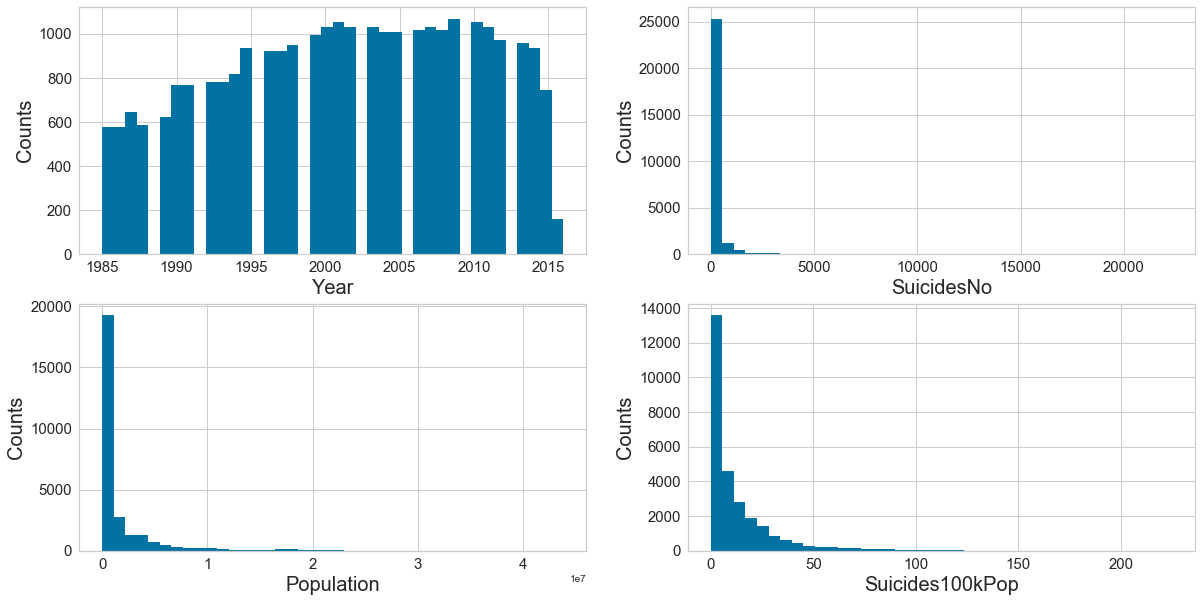

In [12]:
# This sets up the figure size 
plt.rcParams['figure.figsize'] = (20, 10)

# this creates subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['Year', 'SuicidesNo', 'Population', 'Suicides100kPop']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# This draws up the histogram
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

In [17]:
# getting the sum values for each sex for analysis 
group_data=data.groupby(['Age','Gender'])['SuicidesNo'].sum().unstack()
group_data=group_data.reset_index().melt(id_vars='Age')

group_data_female=group_data.iloc[:6,:]
group_data_male=group_data.iloc[6:,:]

In [18]:
group_data_female

,Age,Gender,value
0,15-24 years,female,175437
1,25-34 years,female,208823
2,35-54 years,female,506233
3,5-14 years,female,16997
4,55-74 years,female,430036
5,75+ years,female,221984


In [19]:
group_data_male

,Age,Gender,value
6,15-24 years,male,633105
7,25-34 years,male,915089
8,35-54 years,male,1945908
9,5-14 years,male,35267
10,55-74 years,male,1228407
11,75+ years,male,431134


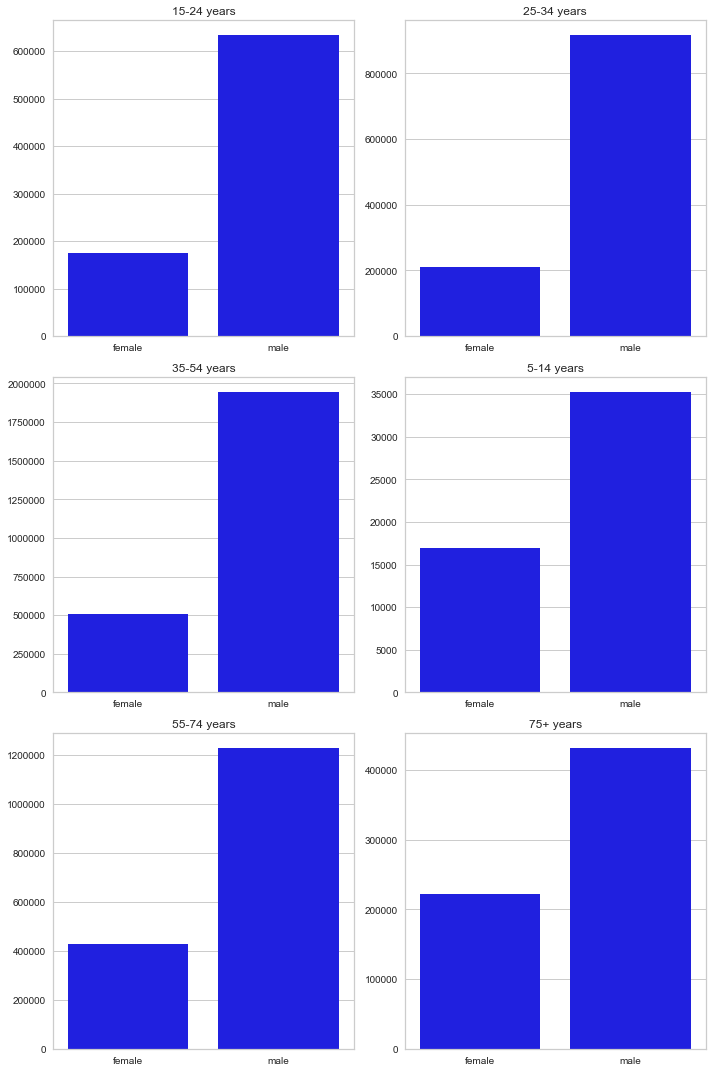

In [20]:
# using the above values to graph the suicide rates per age range. 

female_=[175437,208823,506233,16997,430036,221984]
male_=[633105,915089,1945908,35267,1228407,431134]
plot_id = 0
for i,age in enumerate(['15-24 years','25-34 years','35-54 years','5-14 years','55-74 years','75+ years']):
    plot_id += 1
    plt.subplot(3,2,plot_id)
    plt.title(age)
    fig, ax = plt.gcf(), plt.gca()
    sns.barplot(x=['female','male'],y=[female_[i],male_[i]],color='blue')
    plt.tight_layout()
    fig.set_size_inches(10, 15)
plt.show()  

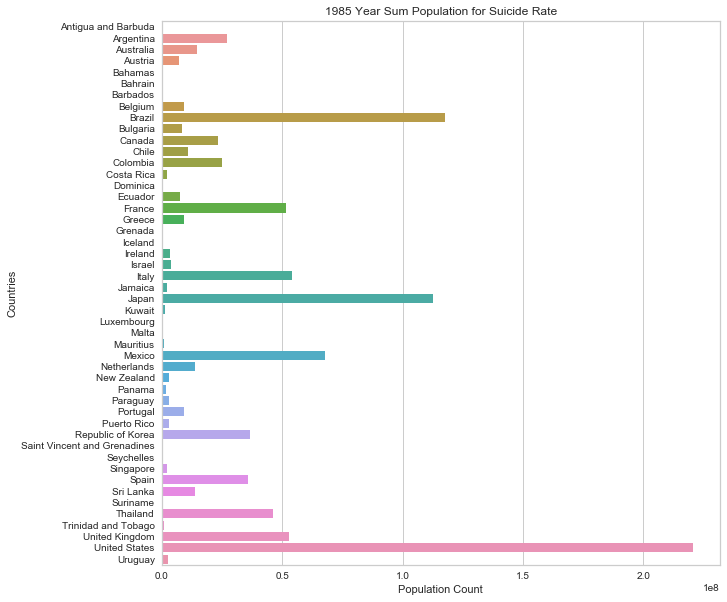

In [21]:
# Here we are looking at the sum of the population for each of these countries in 1985

min_year=min(data.Year)
max_year=max(data.Year)

data_country=data[(data['Year']==min_year)]

country_1985=data[(data['Year']==min_year)].Country.unique()
country_1985_male=[]
country_1985_female=[]


data_country=data[(data['Year']==min_year)]

country_1985_population=[]

for country in country_1985:
    country_1985_population.append(sum(data_country[(data_country['Country']==country)].Population))    

#Now year 1985 find sum population every country

plt.figure(figsize=(10,10))
sns.barplot(y=country_1985,x=country_1985_population)
plt.xlabel('Population Count')
plt.ylabel('Countries')
plt.title('1985 Year Sum Population for Suicide Rate')
plt.show()

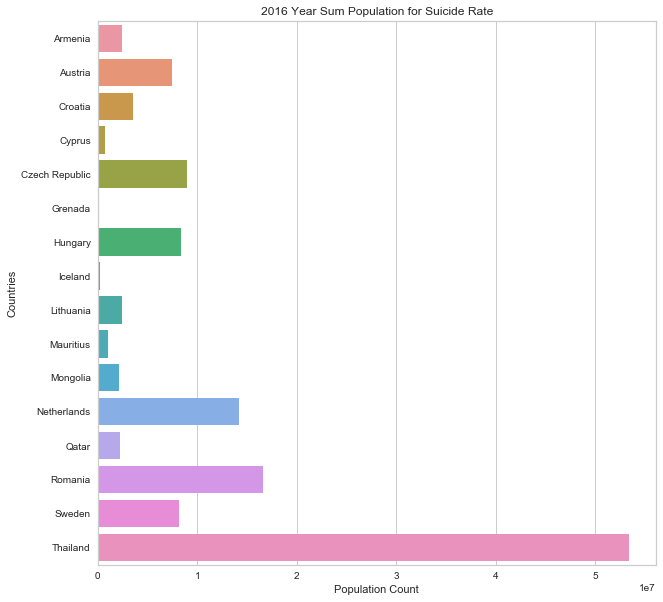

In [22]:
# Here we are looking at the sum of the population for each of these countries in 2016

data_country=data[(data['Year']==max_year)]

country_2016=data[(data['Year']==max_year)].Country.unique()
country_2016_male=[]
country_2016_female=[]

data_country=data[(data['Year']==max_year)]

country_2016_population=[]

for country in country_2016:
    country_2016_population.append(sum(data_country[(data_country['Country']==country)].Population))    

#Now year 1985 find sum population every country

plt.figure(figsize=(10,10))
sns.barplot(y=country_2016,x=country_2016_population)
plt.xlabel('Population Count')
plt.ylabel('Countries')
plt.title('2016 Year Sum Population for Suicide Rate')
plt.show()

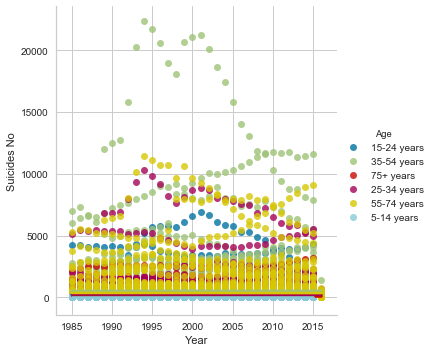

In [23]:
# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="Year", y="SuicidesNo", hue="Age",
               truncate=True, height=5, data=data)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Year", "Suicides No")
plt.show()

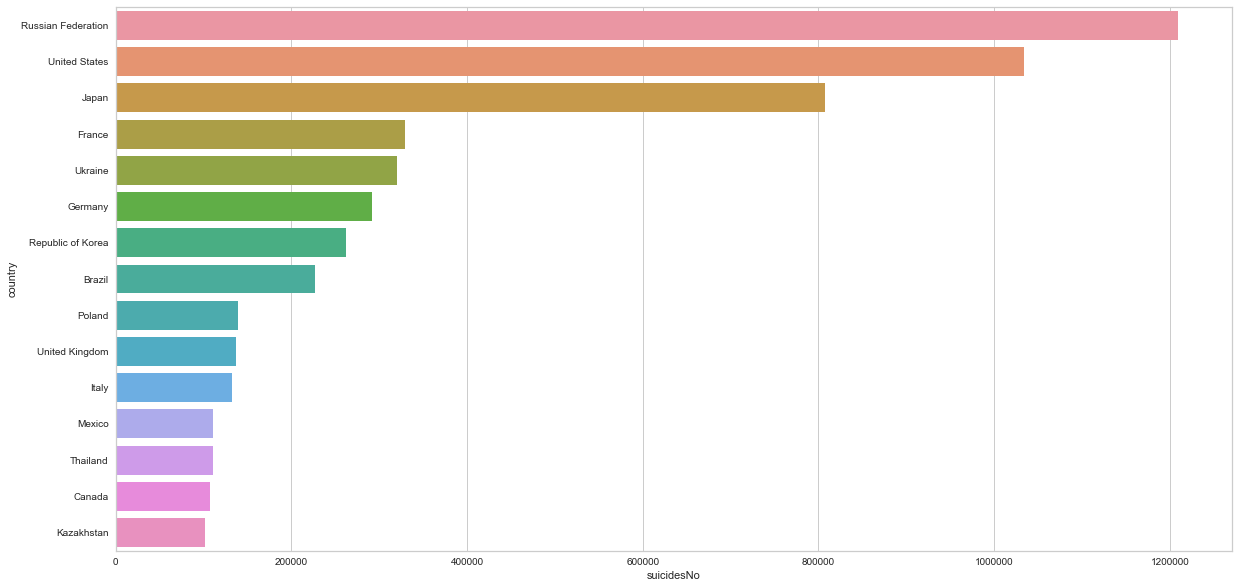

In [24]:
# looking at suicide rates by country as a total sorted most to least 

suicidesNo=[]
for country in data.Country.unique():
    suicidesNo.append(sum(data[data['Country']==country].SuicidesNo)) 

suicidesNo=pd.DataFrame(suicidesNo,columns=['suicidesNo'])
country=pd.DataFrame(data.Country.unique(),columns=['country'])
data_suicide_countr=pd.concat([suicidesNo,country],axis=1)

data_suicide_countr=data_suicide_countr.sort_values(by='suicidesNo',ascending=False)

sns.barplot(y=data_suicide_countr.country[:15],x=data_suicide_countr.suicidesNo[:15])
plt.show()

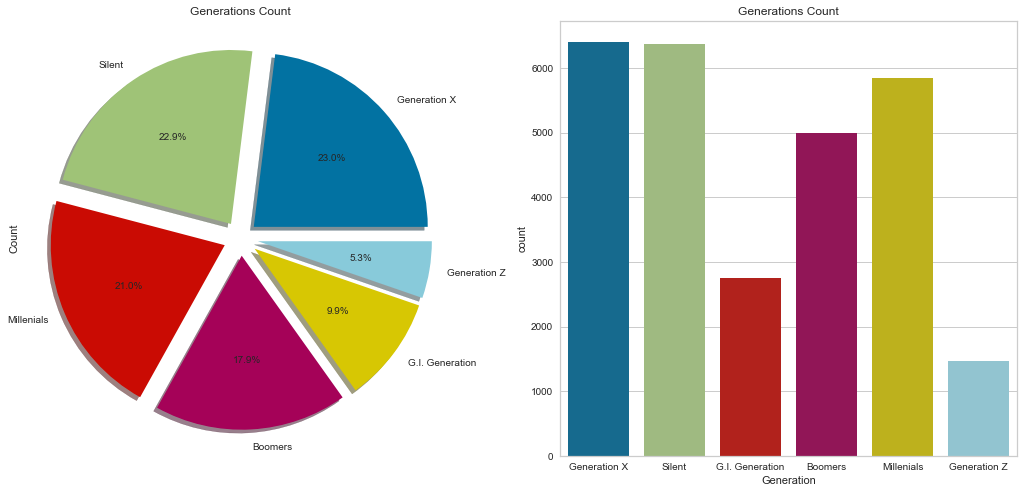

In [25]:
# We grouped the age range into generation names and then listed them in a pie and a bar in the same plot. 
# This is to see the total amount of people in each generation in this dataset. 
# Silent generation is anyone born between 1928 and 1945

f,ax=plt.subplots(1,2,figsize=(18,8))
data['Generation'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Generations Count')
ax[0].set_ylabel('Count')
sns.countplot('Generation',data=data,ax=ax[1])
ax[1].set_title('Generations Count')
plt.show()

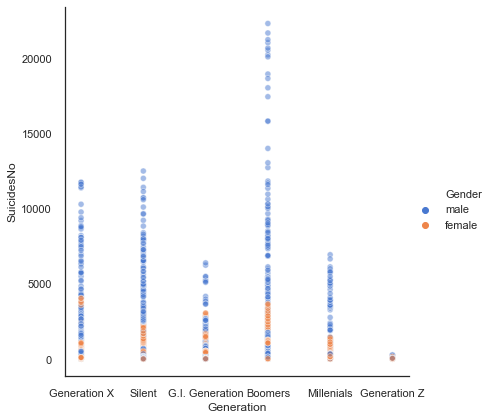

In [26]:
# now seeing the generations suicide rates with gender color coded. 

sns.set(style="white")
sns.relplot(x="Generation",y="SuicidesNo",hue="Gender",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)
plt.show()

### Part 2

In [28]:
#filling the missing age data with median value
def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)

fill_na_median(data['Population'])

# looking at the result
print(data['Population'].describe())

# fill in with the most represented value 
def fill_na_most(data, inplace=True):
    return data.fillna('S', inplace=inplace)

fill_na_most(data['SuicidesNo'])

# looking at the result
print(data['SuicidesNo'].describe())

# log-transformation
def log_transformation(data):
    return data.apply(np.log1p)

data['SuicidesNo'] = log_transformation(data['Population'])

count    2.782000e+04
mean     1.844794e+06
std      3.911779e+06
min      2.780000e+02
25%      9.749850e+04
50%      4.301500e+05
75%      1.486143e+06
max      4.380521e+07
Name: Population, dtype: float64
count    27820.000000
mean       242.574407
std        902.047917
min          0.000000
25%          3.000000
50%         25.000000
75%        131.000000
max      22338.000000
Name: SuicidesNo, dtype: float64


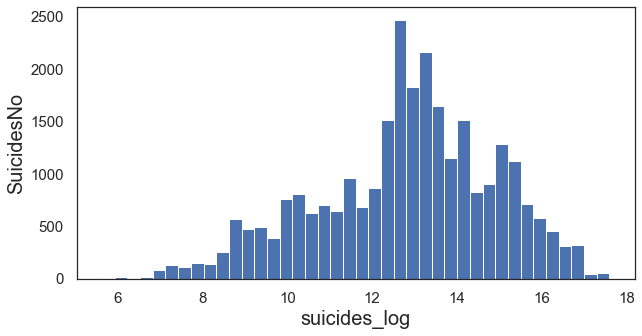

In [30]:
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(data['SuicidesNo'], bins=40)
plt.xlabel('suicides_log', fontsize=20)
plt.ylabel('SuicidesNo', fontsize=20)
plt.tick_params(axis='both', labelsize=15)

In [32]:
# convert the categorical data into numbers and retrieve the categorical data 

death_features = ['Age', 'Gender', "SuicidesNo"]
data_death = data[death_features]
data_death = data_death.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})
# One Hot Encoding 
data_suicide_rate = pd.get_dummies(data_death)
# check the data
print(data_suicide_rate.head(8))

   SuicidesNo  Age_15-24 years  Age_25-34 years  Age_35-54 years  \
0   12.653642                1                0                0   
1   12.637858                0                0                1   
2   12.576605                1                0                0   
3    9.989711                0                0                0   
4   12.521981                0                1                0   
5   10.480129                0                0                0   
6   12.538254                0                0                1   
7   12.457613                0                1                0   

   Age_5-14 years  Age_55-74 years  Age_75+ years  Gender_female  Gender_male  
0               0                0              0              0            1  
1               0                0              0              0            1  
2               0                0              0              1            0  
3               0                0              1              0   

### Part 3

In [33]:
# created a whole features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together
features_model = ['SuicidesNo', 'Population', 'Suicides100kPop', 'GdpPerCapitalMoney']
data_model_X = pd.concat([data[features_model], data_suicide_rate], axis=1)

# create a whole target dataset that can be used for train and validation data splitting
data_model_y = data.replace({'Gender': {1: 'Gender', 0: 'SuicidesNo'}})['Gender']
# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.2, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in test set:", X_val.shape[0])

# Survived and not-survived
print('\n')
print('No. of suicide in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of suicide in the test set:')
print(y_val.value_counts())

No. of samples in training set:  22256
No. of samples in test set: 5564


No. of suicide in the training set:
male      11138
female    11118
Name: Gender, dtype: int64


No. of suicide in the test set:
female    2792
male      2772
Name: Gender, dtype: int64


C:\Users\Tyler\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


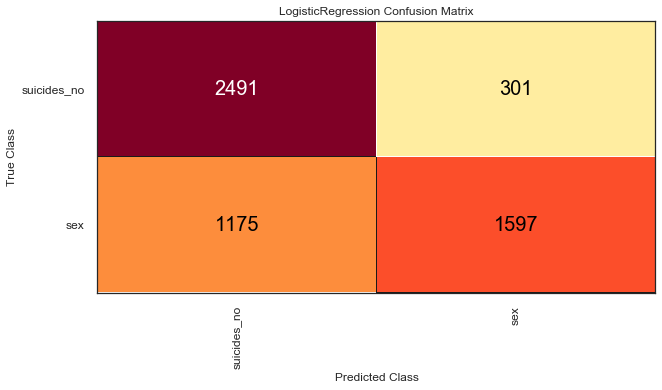

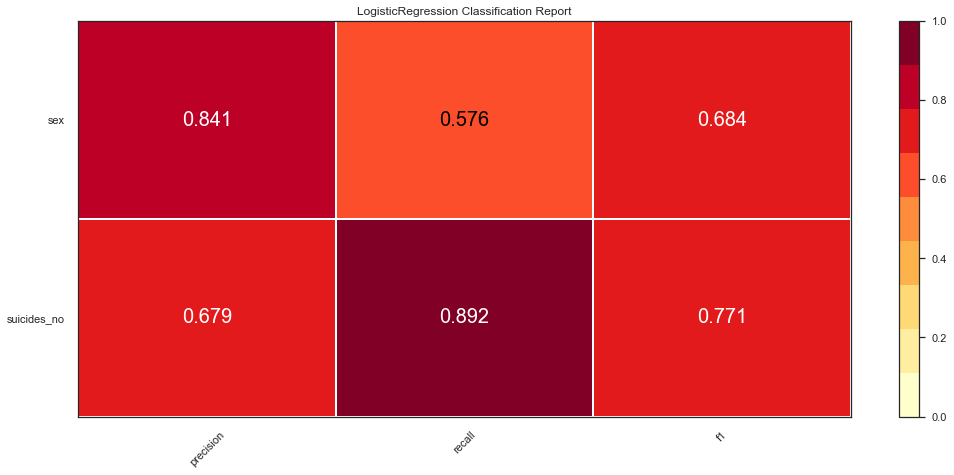

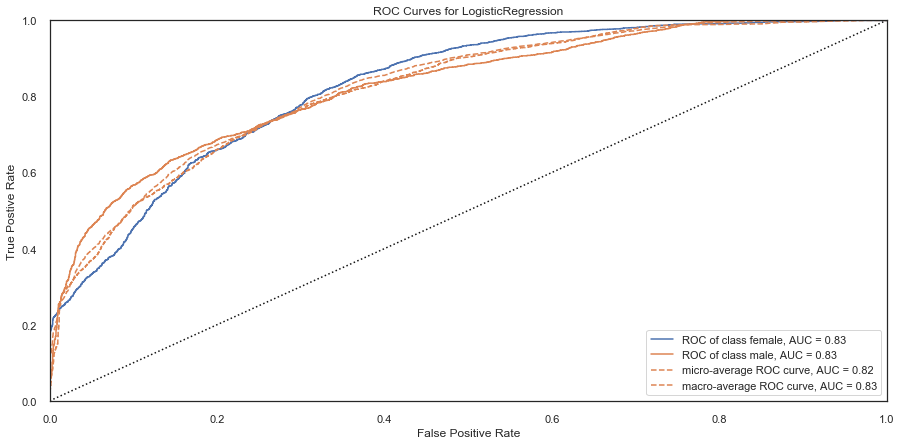

In [34]:
# Eval Metrics
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
classes = ['suicides_no','sex']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()
